In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

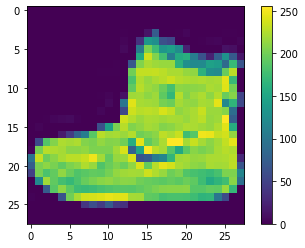

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

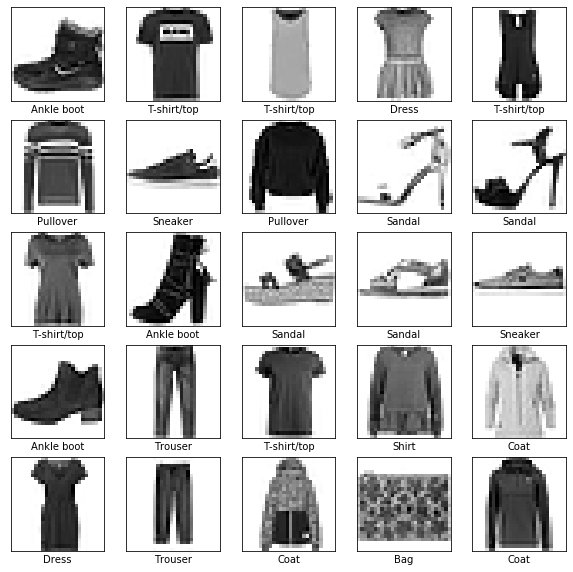

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4984 - accuracy: 0.8242
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3782 - accuracy: 0.8654
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3378 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3121 - accuracy: 0.8860
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2935 - accuracy: 0.8917


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2848 - accuracy: 0.8696


In [11]:
predictions = model.predict(test_images)

predictions[0]

array([1.35745992e-07, 1.32712215e-08, 1.19445147e-08, 7.51477014e-09,
       2.66104827e-08, 1.20784936e-03, 9.56620241e-08, 4.66560898e-03,
       9.00365364e-08, 9.94126201e-01], dtype=float32)

In [12]:
np.argmax(predictions[0])

9

In [14]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label],
                                         color=color))
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

In [24]:
from functools import partial

def show_predict_plot(i, predictions_array, true_label, img):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions_array, true_label, img)
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions_array, true_label)
    plt.show()
    
show = partial(show_predict_plot, 
               predictions_array=predictions, 
               true_label=test_labels, 
               img=test_images)

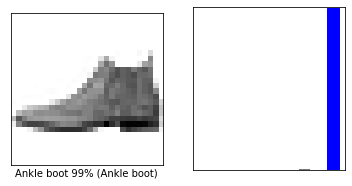

In [25]:
show(0)

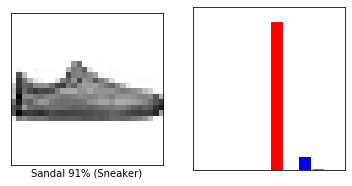

In [26]:
show(12)

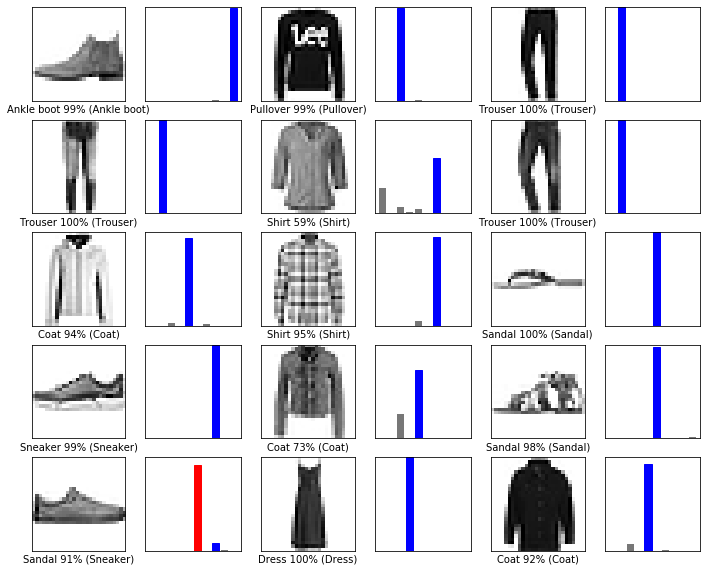

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [28]:
img = test_images[0]

print(img.shape)

(28, 28)


In [29]:
predictions_single = model.predict(img)

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (28, 28)

In [30]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3574599e-07 1.3271196e-08 1.1944515e-08 7.5147701e-09 2.6610483e-08
  1.2078499e-03 9.5662024e-08 4.6656090e-03 9.0036536e-08 9.9412620e-01]]


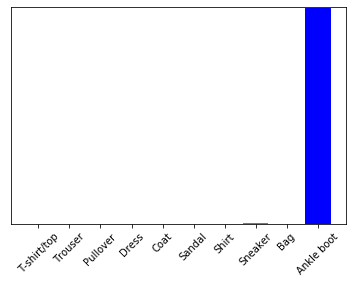

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

9